# Spotify

Données disponibles directement [ici](spotify_dataset.csv)

On va créer deux `DataFrames` :

| `DataFrame` | Contenu |
|:-|:-|
| `spotify`    | données d'origine |
| `spotify_qt` | avec uniquement les variables d'intérêt |
|              | et standardisé pour l'application des méthodes |

Comme il n'y a pas de données manquantes, on utilisera `spotify` pour calculer les centres des classes lorsqu'on voudra les décrire.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
spotify = pandas.read_csv("spotify_dataset.csv")
spotify

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,10s
41095,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,10s
41096,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,10s
41097,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,10s


In [4]:
spotify_qt = spotify[["danceability", "energy", "loudness", "speechiness", 
                      "acousticness", "instrumentalness", "liveness", "valence", 
                      "tempo", "duration_ms", "chorus_hit"]]
spotify_qt = pandas.DataFrame(scale(spotify_qt), columns = spotify_qt.columns)
spotify_qt

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
0,-0.689981,0.160142,0.469661,-0.379213,0.371103,-0.508718,-0.714836,1.131746,2.279088,-0.515621,-0.376564
1,-0.234429,-0.295077,-0.424305,-0.455863,-1.021622,-0.156181,-0.147635,0.952193,-0.602615,-0.178724,0.458697
2,0.659804,0.274936,-0.596960,-0.405925,1.421549,-0.508703,-0.477201,1.367410,-0.116718,-0.091752,-0.151541
3,0.282989,-0.136740,-0.345791,0.360579,1.008452,-0.427667,-0.812549,1.588111,-0.472335,-0.646968,-0.807728
4,-0.138819,0.734114,1.262708,0.592853,1.454007,-0.505845,0.066294,1.359929,-0.162184,0.090146,-0.963259
...,...,...,...,...,...,...,...,...,...,...,...
41094,-2.067887,-0.876966,-0.792398,-0.450057,1.539577,2.673999,0.650262,-1.894103,-1.617400,-0.706227,-0.831225
41095,2.082702,-0.845298,0.050356,0.245604,-0.780846,-0.508718,0.343823,0.738973,0.022291,-0.696619,-0.398198
41096,1.008498,0.888492,1.061998,-0.434959,-1.035785,-0.508708,-0.361564,0.233979,0.022772,-0.059810,-1.019295
41097,0.339230,-1.593441,-1.101181,-0.195717,1.843498,2.351114,-0.303745,0.065648,0.023838,-0.180624,-0.970927


In [24]:
spotify_qt.describe().round(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
count,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00,41099.00
mean,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.04,-2.29,-7.35,-0.85,-1.07,-0.51,-1.09,-2.03,-4.10,-1.85,-2.11
25%,-0.67,-0.73,-0.49,-0.46,-0.96,-0.51,-0.62,-0.79,-0.75,-0.52,-0.66
50%,0.07,0.08,0.18,-0.34,-0.31,-0.51,-0.40,0.06,-0.06,-0.14,-0.22
75%,0.73,0.82,0.72,-0.04,0.92,-0.31,0.34,0.84,0.59,0.27,0.40
max,2.52,1.66,2.63,10.30,1.86,2.79,4.61,1.70,4.20,33.08,20.68


## Pour information

L'application de la CAH sur les 41000 lignes prend un peu plus d'une minute.

In [5]:
%%time
hac_complet = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(spotify_qt)

CPU times: user 1min 15s, sys: 3.75 s, total: 1min 18s
Wall time: 1min 19s


## Kmeans avec $k=100$

In [15]:
kmeans_100 = KMeans(n_clusters = 100).fit(spotify_qt)

In [16]:
kmeans_1 = KMeans(n_clusters = 1).fit(spotify_qt)

Avec la première partition en 100 classes, nous conservons 74% de l'information.

In [17]:
numpy.round(1 - kmeans_100.inertia_ / kmeans_1.inertia_, 4)

0.7424

Ici, nous avons besoin des centres sur les données standardisées pour faire la CAH ensuite.

In [18]:
centres = spotify_qt.assign(classe = kmeans_100.labels_).groupby("classe").mean()
centres

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
classe,,,,,,,,,,,
0,1.158881,0.696036,0.706233,1.487210,-0.690977,-0.475336,1.223793,0.282412,-0.571636,0.044945,-0.095161
1,0.634247,-0.474099,-0.357723,2.318162,0.948972,-0.391661,-0.245644,0.421287,-0.362398,-0.432927,-0.226957
2,0.391983,0.861988,0.781120,-0.246123,-0.739775,-0.474701,-0.391882,0.693126,-0.781701,-0.129716,-0.454121
3,-1.239669,-0.566940,0.026849,-0.365525,0.523610,-0.442635,-0.151215,-0.639581,1.877284,-0.056466,-0.297057
4,-1.137417,-0.609586,-0.620962,-0.377510,-0.642995,2.104556,-0.224859,-1.247163,-0.552981,-0.145098,-0.234207
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.743726,-1.267715,-1.290125,-0.336203,1.363501,2.096820,-0.362072,-1.068948,-0.716960,1.703184,-0.245415
96,0.317411,-0.315998,0.345981,-0.386858,0.566339,-0.480221,-0.422736,-0.584942,0.289895,0.052030,-0.217878
97,0.861905,0.579745,0.756074,1.858970,-0.628254,-0.481733,-0.223752,0.403320,1.347476,-0.087512,-0.295093


In [19]:
corresp01 = pandas.DataFrame({"step0" : spotify_qt.index, "step1" : kmeans_100.labels_})
corresp01

,step0,step1
0,0,30
1,1,71
2,2,34
3,3,34
4,4,78
...,...,...
41094,41094,37
41095,41095,35
41096,41096,59
41097,41097,62


## CAH sur les centres

In [20]:
hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(centres)

In [21]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Une classe a l'air particulière. Sur cette base et en regardant les autres, on peut envisager envisager 5 classes.

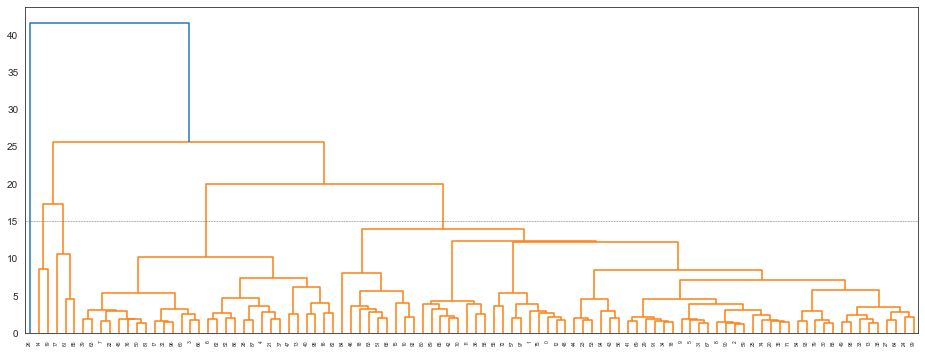

In [25]:
plt.figure(figsize = (16, 6))
plot_dendrogram(hac)
plt.axhline(y = 15, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

In [28]:
hac5 = AgglomerativeClustering(n_clusters = 5).fit(centres)

In [29]:
hac5.labels_

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 4, 0, 1,
       1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [30]:
corresp12 = pandas.DataFrame({"step1" : centres.index, "step2" : hac5.labels_})
corresp12

,step1,step2
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
95,95,1
96,96,1
97,97,0
98,98,0


In [31]:
corresp02 = corresp01.merge(corresp12)
corresp02

,step0,step1,step2
0,0,30,0
1,152,30,0
2,315,30,0
3,575,30,0
4,681,30,0
...,...,...,...
41094,41077,43,0
41095,12966,26,3
41096,29233,26,3
41097,32367,26,3


Ici aussi, on calcule les centres sur les données standardisées.

In [32]:
centres_init = spotify_qt.assign(classe = corresp02.step2).groupby("classe").mean()
centres_init

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
classe,,,,,,,,,,,
0,0.004969,0.031963,0.041729,0.022153,-0.033004,0.002974,-0.004019,-0.028978,0.008362,0.011343,0.007156
1,-0.014625,-0.088463,-0.113821,-0.061042,0.094692,-0.009076,0.012823,0.078461,-0.026042,-0.035120,-0.018728
2,0.122389,0.259094,0.194989,0.171571,-0.368811,0.040058,-0.059751,-0.100801,0.077715,0.157045,0.008156
3,0.268928,-0.839360,-0.599879,-0.179458,0.449149,0.779527,-0.222799,-0.219861,-0.190295,-0.010421,-0.190052
4,-0.094260,-0.234598,-0.254177,-0.185787,0.121224,-0.000425,-0.063339,0.194588,0.165604,0.125417,-0.070531


## Kmeans avec donc 5 classes

In [33]:
kmeans_5 = KMeans(n_clusters = 5, init = centres_init, n_init = 1).fit(spotify_qt)

On ne garde ici au final que 35% de l'information, avec 5 classes. Ce qui est tout de même assez élevé dans un cas réel.

In [34]:
numpy.round(1 - kmeans_5.inertia_ / kmeans_1.inertia_, 4)

0.3485

Pour décrire les classes, on utilise ici les données de départ.

In [35]:
spotify.assign(classe = kmeans_5.labels_).groupby("classe").mean().round(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
classe,,,,,,,,,,,,,,,,
0,0.53,0.67,5.29,-9.33,0.69,0.17,0.35,0.09,0.64,0.56,119.86,247976.56,3.91,42.87,10.66,0.46
1,0.50,0.35,5.14,-12.55,0.76,0.05,0.67,0.04,0.17,0.46,111.82,208296.92,3.80,38.94,9.74,0.47
2,0.68,0.68,5.25,-8.30,0.68,0.07,0.21,0.06,0.15,0.74,115.71,226859.86,3.98,38.78,10.21,0.70
3,0.34,0.22,5.01,-19.57,0.62,0.05,0.80,0.74,0.15,0.24,106.62,282825.86,3.73,41.51,12.54,0.03
4,0.44,0.78,5.29,-7.01,0.69,0.08,0.10,0.18,0.19,0.42,139.33,249482.83,3.91,41.97,10.66,0.42


## Kmeans avec 5 classes, mais en laissant l'initialisation par défaut

In [36]:
kmeans_5bis = KMeans(n_clusters = 5).fit(spotify_qt)

On remarque qu'en faisant ainsi, le résultat est (ici) un peu meilleur (35.5% d'inertie expliquée).

In [37]:
numpy.round(1 - kmeans_5bis.inertia_ / kmeans_1.inertia_, 4)

0.3553

In [38]:
spotify.assign(classe = kmeans_5bis.labels_).groupby("classe").mean().round(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity
classe,,,,,,,,,,,,,,,,
0,0.67,0.68,5.24,-8.39,0.69,0.06,0.22,0.07,0.16,0.74,117.66,226522.73,3.98,38.61,10.20,0.70
1,0.43,0.79,5.27,-7.00,0.69,0.07,0.10,0.18,0.29,0.42,136.00,252519.99,3.91,42.93,10.70,0.39
2,0.49,0.35,5.15,-12.48,0.76,0.04,0.67,0.04,0.19,0.45,112.17,210234.69,3.80,39.08,9.80,0.47
3,0.68,0.63,5.48,-8.82,0.60,0.35,0.29,0.03,0.26,0.57,117.63,234913.88,3.94,40.60,10.39,0.59
4,0.35,0.22,5.01,-19.39,0.62,0.05,0.80,0.74,0.15,0.24,107.04,283607.50,3.73,41.59,12.58,0.03


## Comparaison des deux classes

In [39]:
pandas.crosstab(index = kmeans_5.labels_, columns = kmeans_5bis.labels_, 
                margins = True, margins_name = "Total",
                rownames = ["Hybride"], colnames = ["Direct"])

Direct,0,1,2,3,4,Total
Hybride,,,,,,
0,333,1531,469,818,43,3194
1,203,15,9038,101,45,9402
2,14122,165,10,1093,2,15392
3,1,6,16,21,4152,4196
4,952,7444,217,257,45,8915
Total,15611,9161,9750,2290,4287,41099
